# Medical Insurance Cost Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ##will help us split data into testing and trainig data
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


### Data Analysis

In [4]:
insurance_dataset=pd.read_csv("insurance.csv")

In [5]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_dataset.shape

(1338, 7)

In [7]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# Set a custom color palette
sunset_palette = ["#FF5E5B", "#FFA372", "#FFD07F", "#A56CC1", "#5D3FD3"]
sns.set_palette(sunset_palette)

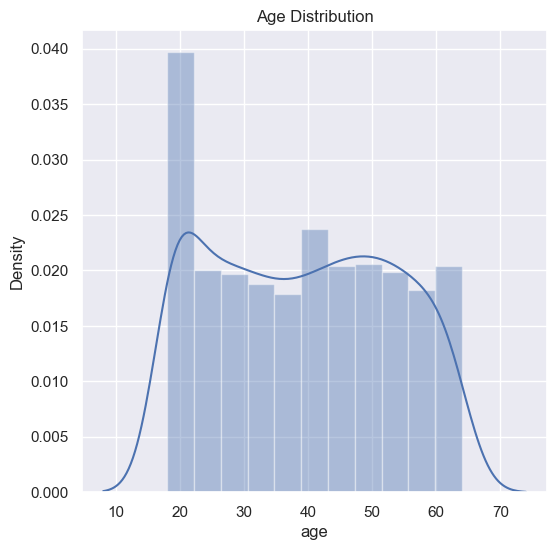

In [11]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

There's a notable peak around age 20, likely indicating most of the people doing health insurance are around the age of 20.

The distribution is fairly uniform beyond age 20, though it gradually tapers off toward older age.

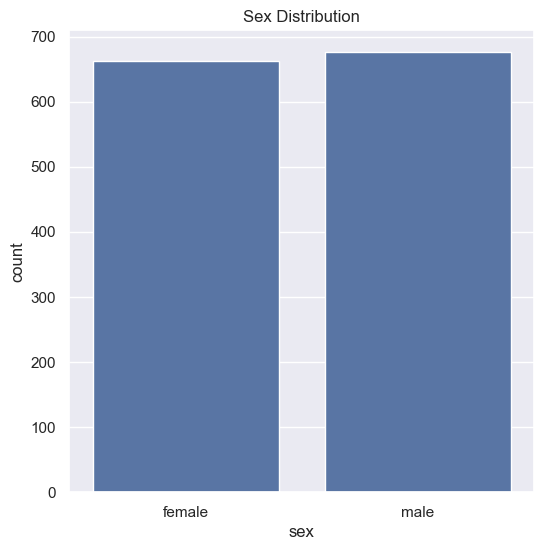

In [13]:
# gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [14]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

The number of males and females is nearly equal. Both categories have a count close to 670 individuals.



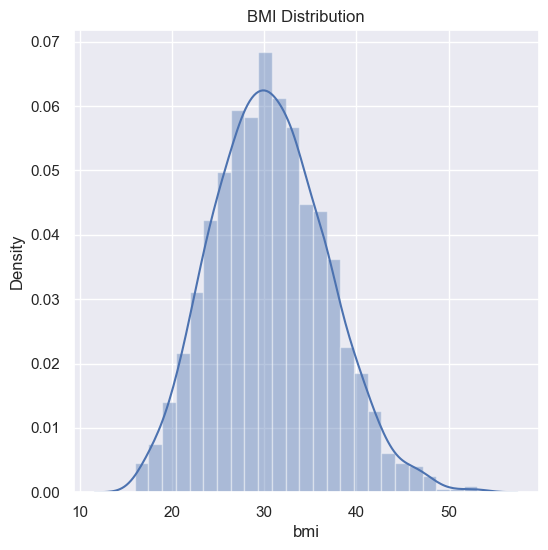

In [28]:
# bmi diswtribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

normal BMI range for a person is 18.5 to 24.9

The peak is around BMI 30, which is on the borderline of overweight and obese categories.

A significant portion of individuals have BMI values between 25 and 35, indicating potential health risks related to weight.

This could be an important predictor for insurance cost, as higher BMI typically correlates with higher medical expenses.



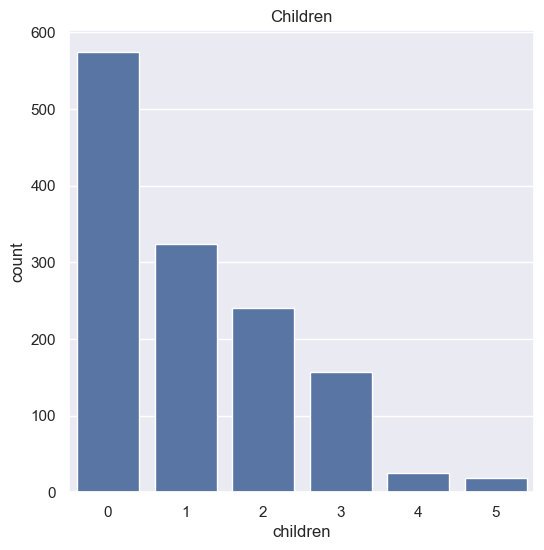

In [32]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()

Most individuals have no children.

There’s a decreasing trend as the number of children increases.

Very few have 4 or 5 children.

In [35]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

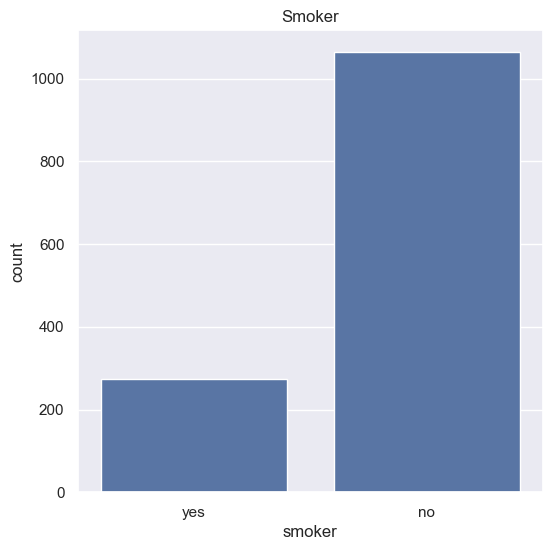

In [37]:
# smokercolumn
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker')
plt.show()

In [39]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

The majority of individuals are non-smokers, with a much smaller proportion being smokers.

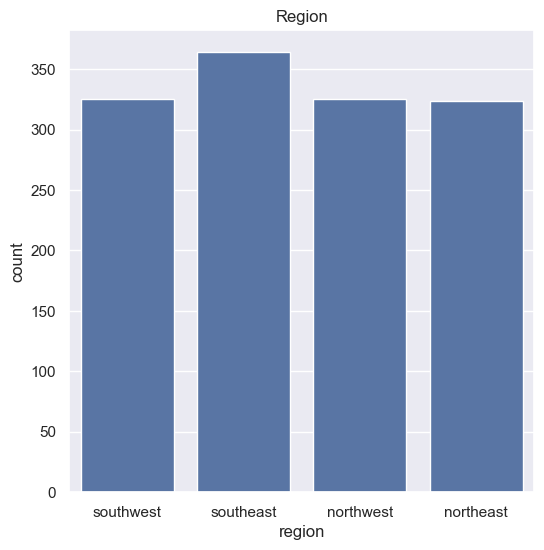

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region')
plt.show()

In [44]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

All regions have fairly balanced counts, with Southeast having the highest count, followed closely by Southwest and Northwest, and Northeast having a similar count to Southwest and Northwest.



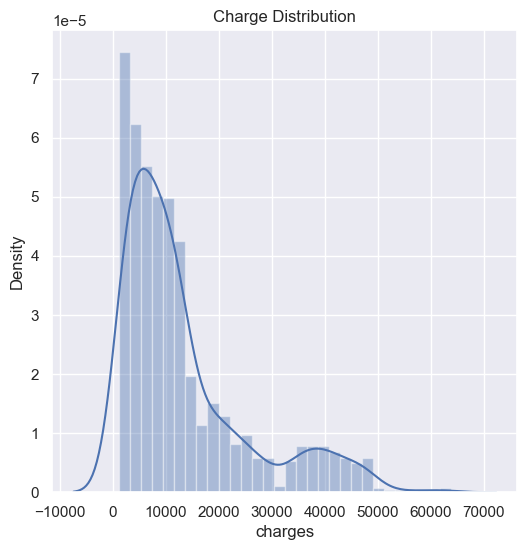

In [47]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charge Distribution')
plt.show()

The distribution is right-skewed, indicating that most people have lower charges, but a few individuals incur very high costs (up to $60,000+).

The peak lies in the range of $0–$10,000, with a sharp drop-off afterwards.

The long tail suggests outliers or high-risk individuals, potentially smokers or those with chronic conditions.

#### Encoding the categorical features

In [51]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

In [53]:
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [55]:
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

#### Splitting the feature and target

In [58]:
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

In [60]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [62]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


#### Splitting the dataa into Training data & Testing data

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [67]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model training

#### Linear regression model

In [71]:
regressor=LinearRegression()

In [73]:
regressor.fit(X_train,Y_train)

LinearRegression()

#### Model evaluation

In [76]:
# prediction on training data
training_data_prediction=regressor.predict(X_train)

In [78]:
# R squared value
r2_train=metrics.r2_score(Y_train,training_data_prediction)

In [80]:
print('R squared value:',r2_train)

R squared value: 0.751505643411174


In [82]:
# prediction on testing data
test_data_prediction=regressor.predict(X_test)

In [84]:
# R squared value
r2_test=metrics.r2_score(Y_test,test_data_prediction)

In [86]:
print('R squared value:',r2_test)

R squared value: 0.7447273869684077


#### Building a predictive system

In [89]:
input_data=(25,0,26.22,0,1,2)

In [91]:
#changing input data viz an tuple to numpy array
input_data_as_numpy_array=np.asarray(input_data)

In [93]:
# reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [95]:
prediction=regressor.predict(input_data_reshaped)

In [97]:
print('The insurance cost in USD:',prediction[0])

The insurance cost in USD: 2808.687798001418


In [99]:

def safe_run_model(train_X, train_y, test_X, test_y, model):
    try:
        print("[INFO] Training model...")
        model.fit(train_X, train_y)
        print("[INFO] Model training complete.")

        y_pred = model.predict(test_X)
        evaluate_model(test_y, y_pred)

    except Exception as e:
        print(f"[ERROR] An issue occurred during training or prediction: {e}")


In [103]:
# Check if XGBoost is available
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    xgb_available = False

In [105]:
# 🏗️ Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

if xgb_available:
    models['XGBoost'] = XGBRegressor(random_state=42)

In [115]:
# 📈 Train and evaluate models
results = {}
trained_models = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(Y_test, predictions)
    mse = mean_squared_error(Y_test, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(Y_test, predictions)
    
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    }
    trained_models[name] = model

In [117]:
# 📝 Results dataframe
results_df = pd.DataFrame(results).T
display(results_df.sort_values(by='R2 Score', ascending=False))

,MAE,MSE,RMSE,R2 Score
Gradient Boosting,2393.548447,1.987548e+07,4458.192523,0.867656
Random Forest,2752.505484,2.434132e+07,4933.692231,0.837920
Linear Regression,4267.213827,3.833704e+07,6191.690842,0.744727
Decision Tree,3183.428871,4.256525e+07,6524.204772,0.716573
K-Nearest Neighbors,8602.471188,1.443115e+08,12012.974236,0.039081


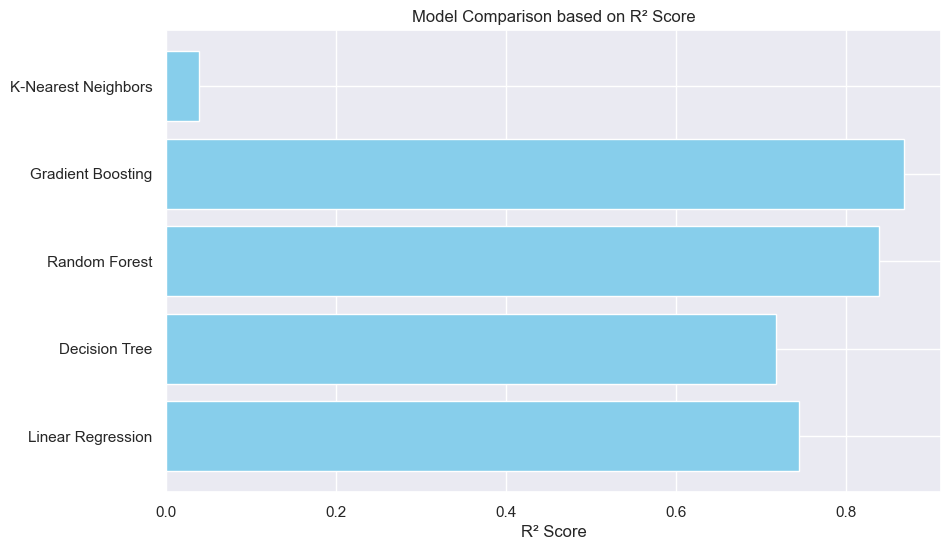

In [119]:
# 📊 Plot R2 Scores
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['R2 Score'], color='skyblue')
plt.xlabel('R² Score')
plt.title('Model Comparison based on R² Score')
plt.grid(True)
plt.show()

In [121]:
# 🏆 Save the best model
best_model_name = results_df['R2 Score'].idxmax()
best_model = trained_models[best_model_name]


In [123]:

# Save the model to a file
joblib.dump(best_model, f'best_model_{best_model_name.replace(" ", "_")}.pkl')

print(f"✅ Best model '{best_model_name}' saved as 'best_model_{best_model_name.replace(' ', '_')}.pkl'")

✅ Best model 'Gradient Boosting' saved as 'best_model_Gradient_Boosting.pkl'
